In [ ]:
import pandas as pd
import numpy as np
import math

RANDOM_STATE = 123
np.random.seed(123)

# Stage 1

### Load data

In [2]:
df_gym = pd.read_csv('data/gym_members_exercise_tracking.csv')

In [3]:
df_gym['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

We remove Yoga Sesions

In [4]:
df_gym = df_gym[df_gym['Workout_Type'] != 'Yoga'].reset_index(drop=True)
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
1,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
2,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
3,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
4,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55


In [5]:
df_gym['Workout_Type'].unique()

array(['HIIT', 'Cardio', 'Strength'], dtype=object)

In [6]:
df_hr = pd.read_csv('data/heart_rate.csv')

## Synthetic data

### Obtain standard deviation

In [7]:
# Convert de dataframe columns into lists
subject_1 = df_hr.iloc[:, 0].tolist()
subject_2 = df_hr.iloc[:, 1].tolist()
subject_3 = df_hr.iloc[:, 2].tolist()
subject_4 = df_hr.iloc[:, 3].tolist()



#Remove nans from the lists
subject_1 = [x for x in subject_1 if str(x) != 'nan']
subject_2 = [x for x in subject_2 if str(x) != 'nan']
subject_3 = [x for x in subject_3 if str(x) != 'nan']
subject_4 = [x for x in subject_4 if str(x) != 'nan']

In [8]:
print('Measurements for subject 1:', len(subject_1))
print('Measurements for subject 2:', len(subject_2))
print('Measurements for subject 3:', len(subject_3))
print('Measurements for subject 4:', len(subject_4))

Measurements for subject 1: 1800
Measurements for subject 2: 1800
Measurements for subject 3: 950
Measurements for subject 4: 891


In [9]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [round(np.mean(subject_1), 2), round(np.max(subject_1), 2), round(np.min(subject_1), 2), round(np.std(subject_1), 2), ]
subject_2_data = [round(np.mean(subject_2), 2), round(np.max(subject_2), 2), round(np.min(subject_2), 2), round(np.std(subject_2), 2)]
subject_3_data = [round(np.mean(subject_3), 2), round(np.max(subject_3), 2), round(np.min(subject_3), 2), round(np.std(subject_3), 2)]
subject_4_data = [round(np.mean(subject_4), 2), round(np.max(subject_4), 2), round(np.min(subject_4), 2), round(np.std(subject_4), 2)]

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.head()


,Mean,Max,Min,Std
Subject 1,92.60,106.76,73.44,5.49
Subject 2,96.64,104.90,80.21,5.69
Subject 3,58.67,75.47,52.08,3.41
Subject 4,58.52,77.42,52.92,3.48


In [10]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[0])) #Standard deviation represented as a its ratio of the range between the mean and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[0]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[0]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[0]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.39
Subject 2,96.64,104.90,80.21,5.69,0.69
Subject 3,58.67,75.47,52.08,3.41,0.20
Subject 4,58.52,77.42,52.92,3.48,0.18


In [11]:
mean_std_ratio_avg_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_avg_max)

0.36578887474025085


In [12]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[2])) #Standard deviation represented as a its ratio of the range between the minimum and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[2]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[2]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[2]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.16
Subject 2,96.64,104.90,80.21,5.69,0.23
Subject 3,58.67,75.47,52.08,3.41,0.15
Subject 4,58.52,77.42,52.92,3.48,0.14


In [13]:
mean_std_ratio_min_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_min_max)

0.17072102970888003


The mean ratio of the standar deviation with respect to the interval between average and maximum heart rate values is 36.58% and between minimum and maximum is 17.07%.

### Generate synthetic data

#### Generation study

In [14]:
from scipy.stats import truncnorm

def genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N):
    a = (min_val - avg) / std
    b = (max_val - avg) / std

    genarated_heart_rates = truncnorm.rvs(a, b, loc=avg, scale=std, size=N)

    return genarated_heart_rates

In [15]:
from scipy.stats import beta

def beta_params(min_val, max_val, avg, std):
    # Calculate α and β params of Beta distribution
    scale = max_val - min_val
    mu = (max_val - min_val) / scale  # Media en [0,1]
    sigma2 = (std / scale) ** 2  # Varianza en [0,1]
    
    # Equations for α and β from mean and variance
    alpha = mu * ((mu * (1 - mu)) / sigma2 - 1)
    beta_param = (1 - mu) * ((mu * (1 - mu)) / sigma2 - 1)
    
    return alpha, beta_param

def genarate_heart_rates_beta_old(min_val, max_val, avg, std, N):
    # Generate random numbers with Beta distribution scaled to [min, max]
    alpha, beta_param = beta_params(min_val, max_val, avg, std)
    
    if alpha <= 0 or beta_param <= 0:
        raise ValueError("The parameters α and β must be positive. Check the mean and standard deviation.")
    
    # Generar valores Beta en [0,1] y escalar al rango [minimo, maximo]
    numbers = beta.rvs(alpha, beta_param, size=N)
    numbers = min_val + numbers * (max_val - min_val)
    
    return numbers

In [16]:
import scipy.stats
import matplotlib.pyplot as plt

#TODO eliminar
def my_distribution_old(min_val, max_val, mean, std):
    scale = max_val - min_val
    location = min_val
    # Mean and standard deviation of the unscaled beta distribution
    unscaled_mean = (mean - min_val) / scale
    unscaled_var = (std / scale) ** 2
    # Computation of alpha and beta can be derived from mean and variance formulas
    t = unscaled_mean / (1 - unscaled_mean)
    beta = ((t / unscaled_var) - (t * t) - (2 * t) - 1) / ((t * t * t) + (3 * t * t) + (3 * t) + 1)
    alpha = beta * t
    # Not all parameters may produce a valid distribution
    if alpha <= 0 or beta <= 0:
        raise ValueError('Cannot create distribution for the given parameters.')
    # Make scaled beta distribution with computed parameters
    return scipy.stats.beta(alpha, beta, scale=scale, loc=location)

def my_distribution(min_val, max_val, mean, std):
    scale = max_val - min_val
    mean_std = (mean - min_val) / scale
    var_std = (std / scale) ** 2

    alpha = ((1-mean_std) / var_std  - 1/mean_std) * mean_std**2

    beta_param = alpha * (1 / mean_std - 1)

    return scipy.stats.beta(a= alpha, b=beta_param, loc=min_val, scale=scale)

def genarate_heart_rates_beta(min_val, max_val, avg, std, N, plot=False):
    my_dist = my_distribution(min_val, max_val, avg, std)
    
    generated_numbers = my_dist.rvs(size=N)
    if plot:  
        x = np.linspace(min_val, max_val, 100)
        plt.plot(x, my_dist.pdf(x))
    return generated_numbers

In [17]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
1,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
2,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
3,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
4,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55


Min: 66, Max: 179, Avg: 151, Std: 10.242088492727024, N: 78
Using truncated normal distribution
Generated average: 151.06
Generated std: 8.01
Generated min: 129.06
Generated max: 172.59


Using beta distribution
Generated average: 150.90
Generated std: 10.28
Generated min: 126.41
Generated max: 168.94


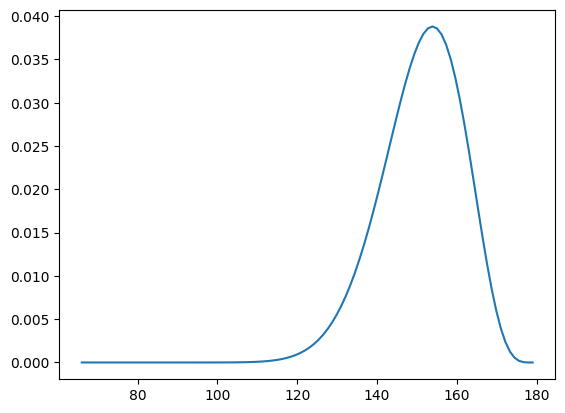

In [18]:
min_val, max_val, avg, N = df_gym.iloc[0]['Resting_BPM'], df_gym.iloc[0]['Max_BPM'], df_gym.iloc[0]['Avg_BPM'], math.trunc(df_gym.iloc[0]['Session_Duration (hours)'] * 60)
std = mean_std_ratio_avg_max * (max_val - avg)
print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")


genarated_heart_rates_truncnorm = genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N)

print("Using truncated normal distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_truncnorm, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_truncnorm):.2f}")

genarated_heart_rates_beta = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

print("\n\nUsing beta distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_beta):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_beta, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_beta):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_beta):.2f}")


In [46]:
df_gym.iloc[54:55]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
54,48,Female,67.1,1.61,160,151,74,0.62,421.0,Cardio,33.4,1.5,2,1,25.89


Error for index 57: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.beta` documentation for details.


C:\Users\danih\AppData\Local\Temp\ipykernel_29784\845120679.py:26: RuntimeWarning: invalid value encountered in scalar divide
  alpha = ((1-mean_std) / var_std  - 1/mean_std) * mean_std**2


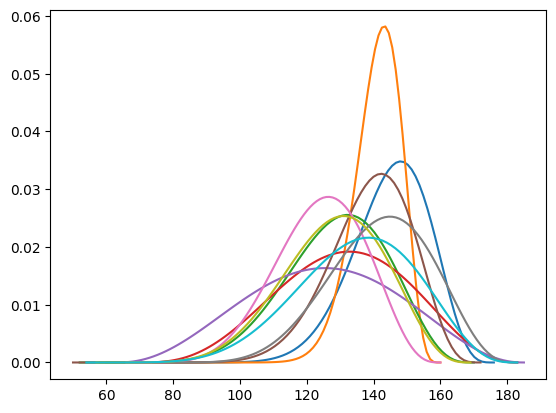

In [58]:
for index, row in df_gym.iloc[55:66].iterrows():
    min_val, max_val, avg, N = row['Resting_BPM'], row['Max_BPM'], row['Avg_BPM'], math.trunc(row['Session_Duration (hours)'] * 60)
    std = mean_std_ratio_avg_max * (max_val - avg)
    
    try:
        genarated_heart_rates_session = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

        # print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")
        
        # print(f"Real average: {np.mean(genarated_heart_rates_session):.2f}")
        # print(f"Real std: {np.std(genarated_heart_rates_session, ddof=1):.2f}")
        # print(f"Real min: {np.min(genarated_heart_rates_session):.2f}")
        # print(f"Real max: {np.max(genarated_heart_rates_session):.2f}")

        # print('\n')
    except Exception as e:
        print(f"Error for index {index}: {e}")
        continue


#### Data generation

In [58]:
def generate_heart_rates(min_val, max_val, avg, N, std_ratio):
    std = std_ratio * (max_val - avg)
    try:
        return genarate_heart_rates_beta(min_val, max_val, avg, std, N, False)
    
    except Exception as e:
        return None

In [59]:
clients_heart_rates = []
valid_indexes = []
user_final_id = 0

for index, row in df_gym.iterrows():
    heart_rates = generate_heart_rates(row['Resting_BPM'], row['Max_BPM'], row['Avg_BPM'], math.trunc(row['Session_Duration (hours)'] * 60), mean_std_ratio_avg_max)
    
    if heart_rates is not None:
        for hr in heart_rates:
            clients_heart_rates.append({
                'User_ID': user_final_id,
                'Heart_Rate': int(hr)
            })
        valid_indexes.append(index)
        user_final_id += 1

df_pulses = pd.DataFrame(clients_heart_rates)
df_gym_members_with_hr = df_gym.loc[valid_indexes].reset_index(drop=True)

C:\Users\Dani\AppData\Local\Temp\ipykernel_19776\845120679.py:26: RuntimeWarning: invalid value encountered in scalar divide
  alpha = ((1-mean_std) / var_std  - 1/mean_std) * mean_std**2


In [60]:
df_pulses.to_csv('data/gym_members_heart_rates.csv', index=False)
df_gym_members_with_hr.to_csv('data/modified_gym_members_exercise_tracking.csv', index=False)

# Stage 2

In [61]:
df_users_raw = pd.read_csv('data/Million Song Dataset kaggle/User Listening History.csv')
df_music = pd.read_csv('data/Million Song Dataset kaggle/Music Info.csv')

We only take into account users that have listened to at least 10 songs

In [62]:
df_user_counts = df_users_raw['user_id'].value_counts().reset_index()
df_user_counts.columns = ['user_id', 'count']

In [63]:
df_users = df_users_raw[df_users_raw['user_id'].isin(df_user_counts[df_user_counts['count'] > 5]['user_id'])].reset_index(drop=True)
df_users.shape

(8332242, 3)

In [64]:
df_users

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
...,...,...,...
8332237,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
8332238,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
8332239,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
8332240,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1


In [65]:
df_users.to_csv('data/User Listening History_modified.csv', index=False)